# TP N°5 - Circuitos trifásicos
__U.N.L.Z. - Facultad de Ingeniería__       
__Electrotecnia__      
__Alumno:__ Daniel Antonio Lorenzo       
<mark><strong>(Resolución en python3)</strong></mark>

## Problema N°2
Un sistema trifásico CBA (secuencia inversa o indirecta 3x380V (tensión eficaz compuesta o de línea), de 4 conductores (tetrafilar), alimenta una carga trifásica conectada en estrella.
El valor de cada impedancia es de 20 Ohm con ángulo de desfasaje de 30° capacitivo.
1. Calcular las corrientes $I_r, \, I_s, \, I_t, \, I_\mathrm{neutro}$, representar diagrama fasorial de tensiones y corrientes.
2. Determinar la potencia por fase y trifásica.
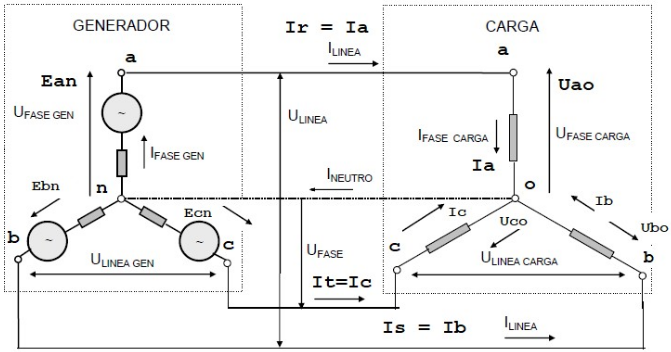

### Solución

* Las tensiones de generación las denominaremos con la letra E, $E_{an}, \, E_{bn}, \, E_{cn}$
* Las caídas de tensión en las impedancias de carga las denominamos con la letra U, $U_{ao}, \; U_{bo}, \, U_{co}$
* Las corrientes que circulan por la carga las denominamos con la letra I, $I_a, \, I_b \, I_c$

La corriente que circula por el cuarto conductor, que une el centro de estrella del generador (n) y el neutro de la carga (o), se denomina corriente de neutro, $I_\mathrm{neutro}$

In [ ]:
import numpy as np
import cmath

In [ ]:
# Datos
E_lin = 380 # V                  Tensión de línea
E_fase = E_lin/np.sqrt(3)  #     Tensión de fase
# Tensiones de generación
Ean = cmath.rect(E_fase, np.deg2rad(0) )
Ebn = cmath.rect(E_fase, np.deg2rad(120))
Ecn = cmath.rect(E_fase, np.deg2rad(240))
# Tensiones en las impedancias de carga
Uao = Ean
Ubo = Ebn
Uco = Ecn
# Impedancias de carga
Za = cmath.rect(20, np.deg2rad(-30) )
Zb = Za
Zc = Za

In [ ]:
# Cálculo de corrientes de fase
Ia = Uao/Za
Ib = Ubo/Zb
Ic = Uco/Zc
# Corriente de neutro (sistema balanceado)
I_neutro = Ia + Ib + Ic
# Potencia aparente
Sa = Uao*Ia.conjugate()
Sb = Ubo*Ib.conjugate()
Sc = Uco*Ic.conjugate()
# Potencia real
Pa = Sa.real
Pb = Sb.real
Pc = Sc.real
# Potencia reactiva
Qa = Sa.imag
Qb = Sb.imag
Qc = Sc.imag
# Potencia trifásica aparente 
Strif = Sa + Sb + Sc
# Potencia trifásica real
Ptrif = Strif.real
# Potencia trifásica reactiva
Qtrif = Strif.imag

In [ ]:
#@title Resultados:
print('Corrientes de fase:')
print('Ia = (%.2f ∠ %.2f°) A'%(abs(Ia) , np.rad2deg( cmath.phase(Ia) ) ))
print('Ib = (%.2f ∠ %.2f°) A'%(abs(Ib) , np.rad2deg( cmath.phase(Ib) ) ))
print('Ic = (%.2f ∠ %.2f°) A'%(abs(Ic) , np.rad2deg( cmath.phase(Ic) ) ))
print('Corriente de neutro:')
print('I_neutro = %.2f A'%abs(I_neutro))
print('Potencia aparente:')
print('Sa = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sa)%(abs(Sa) , np.rad2deg( cmath.phase(Sa) ) ))
print('Sb = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sb)%(abs(Sb) , np.rad2deg( cmath.phase(Sb) ) ))
print('Sc = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Sc)%(abs(Sc) , np.rad2deg( cmath.phase(Sc) ) ))
print('Potencia activa:')
print('Pa = %.2f W'%Pa)
print('Pb = %.2f W'%Pb)
print('Pc = %.2f W'%Pc)
print('Potencia reactiva:')
print('Qa = %.2f VAr'%Qa)
print('Qb = %.2f VAr'%Qb)
print('Qc = %.2f VAr'%Qc)
print('Potencia trifásica aparente:')
print('Strif = {:.2f} VA = (%.2f ∠ %.2f°) VA'.format(Strif)%(abs(Strif) , np.rad2deg( cmath.phase(Strif) ) ))
print('Potencia trifásica activa:')
print('Ptrif = %.2f W'%Ptrif)
print('Potencia trifásica reactiva:')
print('Qtrif = %.2f VAr'%Qtrif)

Corrientes de fase:
Ia = (10.97 ∠ 30.00°) A
Ib = (10.97 ∠ 150.00°) A
Ic = (10.97 ∠ -90.00°) A
Corriente de neutro:
I_neutro = 0.00 A
Potencia aparente:
Sa = 2084.23-1203.33j VA = (2406.67 ∠ -30.00°) VA
Sb = 2084.23-1203.33j VA = (2406.67 ∠ -30.00°) VA
Sc = 2084.23-1203.33j VA = (2406.67 ∠ -30.00°) VA
Potencia activa:
Pa = 2084.23 W
Pb = 2084.23 W
Pc = 2084.23 W
Potencia reactiva:
Qa = -1203.33 VAr
Qb = -1203.33 VAr
Qc = -1203.33 VAr
Potencia trifásica aparente:
Strif = 6252.70-3610.00j VA = (7220.00 ∠ -30.00°) VA
Potencia trifásica activa:
Ptrif = 6252.70 W
Potencia trifásica reactiva:
Qtrif = -3610.00 VAr


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

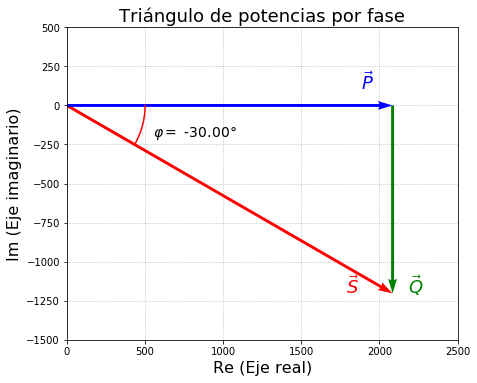

In [ ]:
#@title Gráfico:
%matplotlib inline
plt.figure(figsize=(7,7))
ax = plt.gca()
ax.quiver(0,0,Pa,Qa,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,Pa,0,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(Pa,0,0,Qa,angles='xy',scale_units='xy',scale=1,color='green')   
plt.text(Pa - 300, Qa, r'$\vec S$', fontsize=18, color='red', fontweight='bold')
plt.text(Pa - 200,  100, r'$\vec P$', fontsize=18, color='blue', fontweight='bold')
plt.text(Pa + 100, Qa, r'$\vec Q$', fontsize=18, color='green', fontweight='bold')
plt.text(550,  -200, r'$\varphi =$ %.2f°'%( np.rad2deg( cmath.phase(Sa) ) ), fontsize=14)
theta = np.linspace(0, cmath.phase(Sa), 100) 
x1 = 500 * np.cos(theta)
x2 = 500 * np.sin(theta)
plt.plot(x1, x2, color='red')
ax.set_xlim([0,2500])
ax.set_ylim([-1500,500])
ax.set_aspect('equal')
plt.title('Triángulo de potencias por fase', fontsize=18)
plt.xlabel('Re (Eje real)',  fontsize=16)
plt.ylabel('Im (Eje imaginario)',  fontsize=16)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
plt.draw()
plt.show()

A cada una de las fases le corresponde un valor de potencia monofásica.

In [ ]:
%reset -s -f